In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

#set the visual style
sns.set_theme(style="whitegrid")

In [ ]:
df = pd.read_csv(r'C:\Users\AMIT\OneDrive\Documents\Data Analyst_Internship_Projects\CocaCola_Stock_live_updated\coca-cola_stock_history.csv')

In [1]:
print(df.head())

NameError: name 'df' is not defined

In [ ]:
print(df.info())

In [19]:
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_localize(None)
df.set_index('Date', inplace=True)

#set date as the index
sns.set_theme(style="whitegrid")

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], color='red', linewidth=1.5)
plt.title('Coca-Cola Stock Price (1962 - 2022)')
plt.show()

print("Data cleaned successfully!")

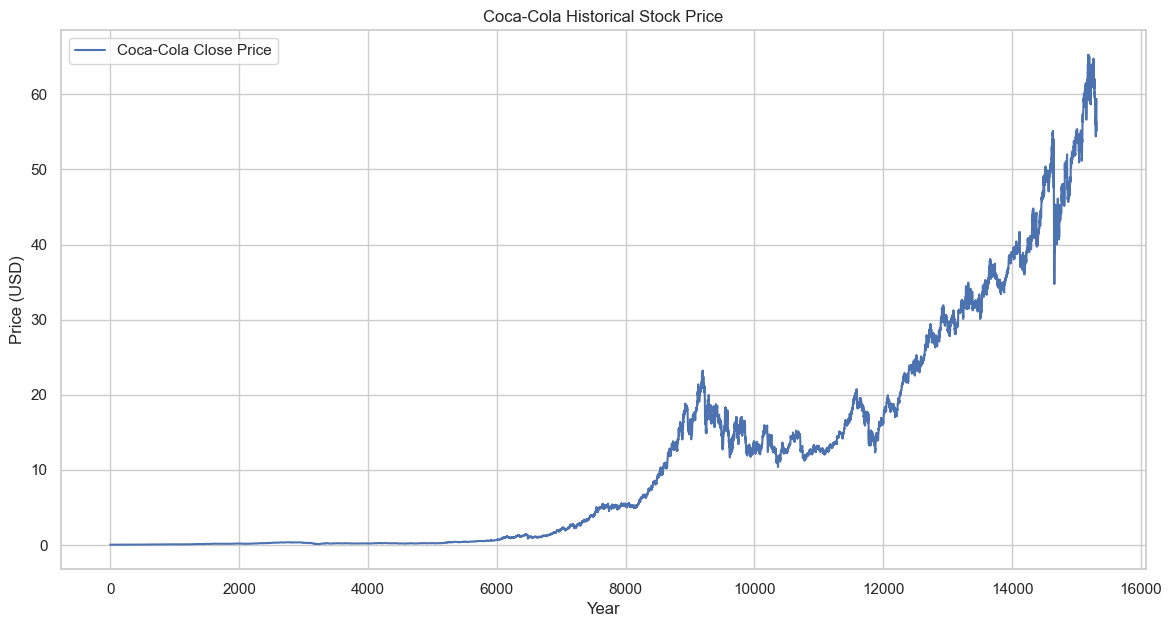

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Coca-Cola Close Price')
plt.title('Coca-Cola Historical Stock Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


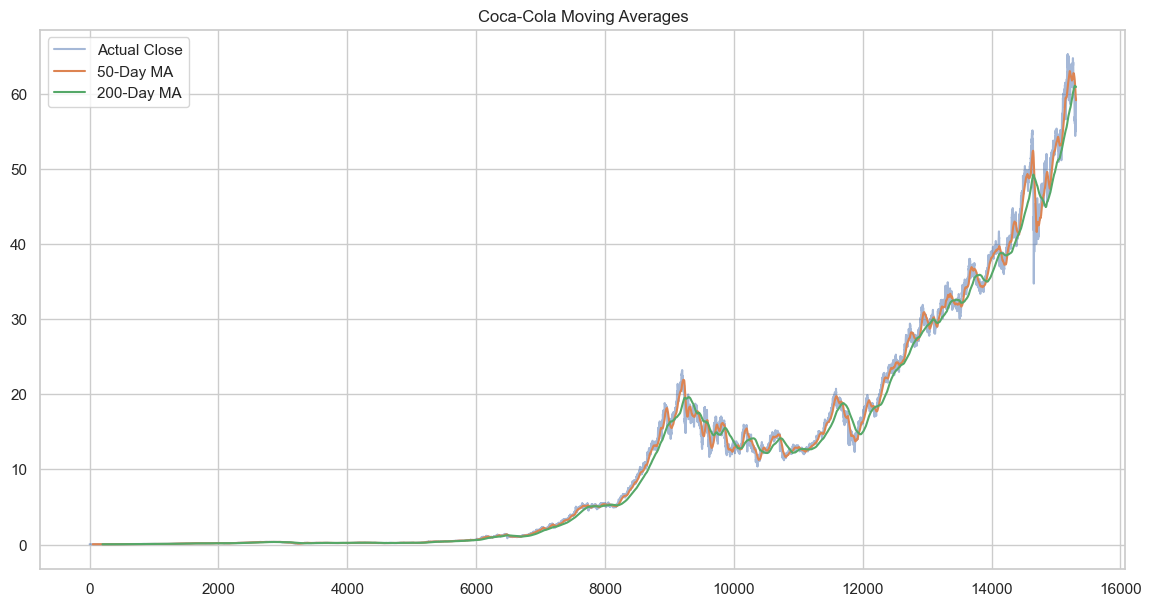

In [10]:
# calculate 50-day and 200-day moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Visualizing Moving Averages against the close price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], alpha=0.5, label='Actual Close')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title('Coca-Cola Moving Averages')
plt.legend()
plt.show()



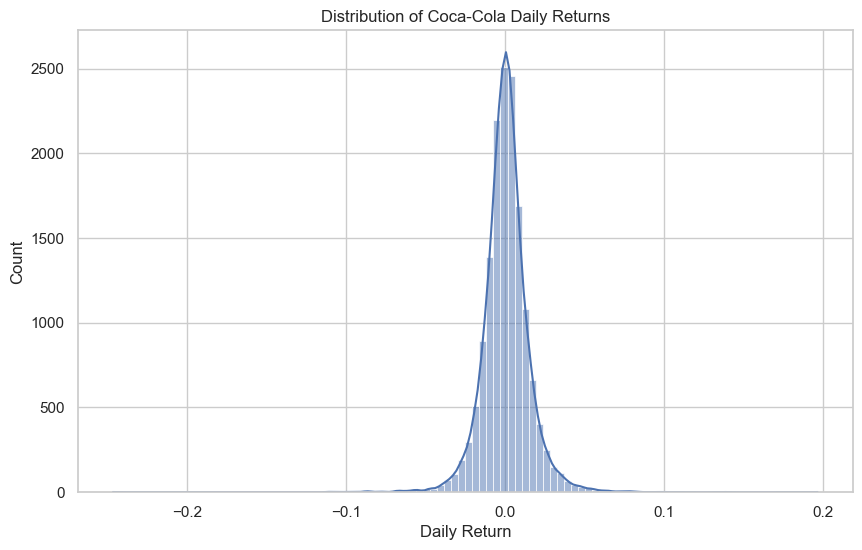

Annaulized Volatility: 23.15%


In [15]:
# Calculating Daily Percentage Change
df['Daily Return'] = df['Close'].pct_change()

# Distributions of Daily REturns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Coca-Cola Daily Returns')
plt.show()

# print average annual volatility
volatility = df['Daily Return'].std() * np.sqrt(252)
print(f"Annaulized Volatility: {volatility:.2%}")

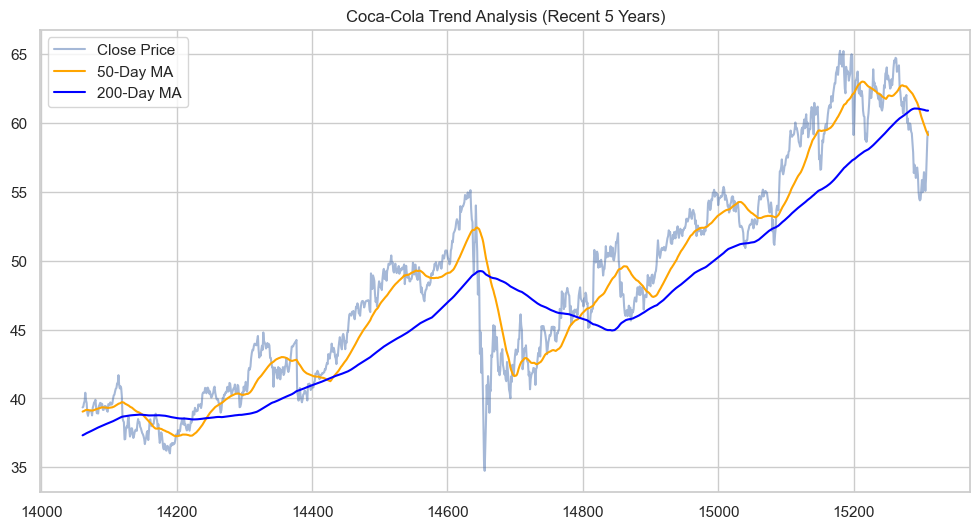

In [12]:
# Visualize the last 5 year for clarity 
plt.figure(figsize=(12, 6))
plt.plot(df['Close'].iloc[-1250:], label='Close Price', alpha=0.5)
plt.plot(df['MA50'].iloc[-1250:], label='50-Day MA', color='orange')
plt.plot(df['MA200'].iloc[-1250:], label='200-Day MA', color='blue')
plt.title('Coca-Cola Trend Analysis (Recent 5 Years)')
plt.legend()
plt.show()

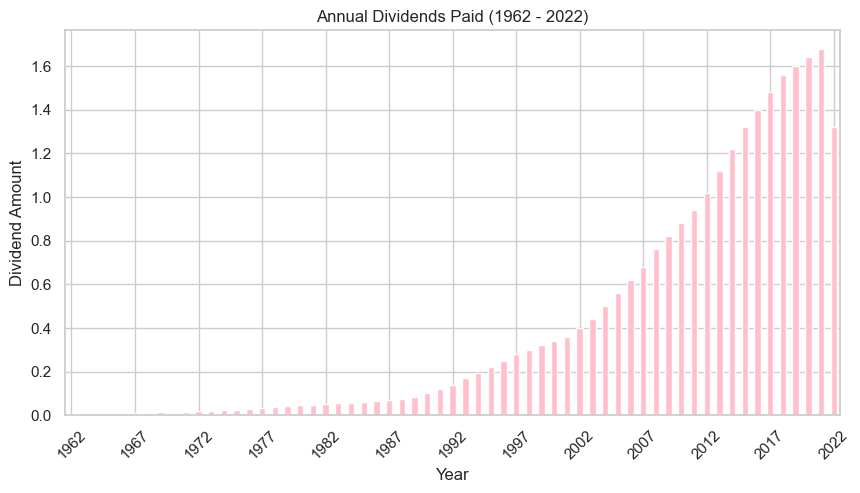

In [21]:
annual_dividends = df['Dividends'].resample('YE').sum()

plt.figure(figsize=(10, 5))
annual_dividends.plot(kind ='bar', color='pink')
plt.title('Annual Dividends Paid (1962 - 2022)')
plt.xlabel('Year')
plt.ylabel('Dividend Amount')

#fix x-axis labels to show years only
plt.xticks(ticks=range(0, len(annual_dividends), 5), 
           labels=annual_dividends.index.year[::5], rotation=45)
plt.show()
           